In [1]:
import random
import sys
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from citipy import citipy
import openweathermapy.core as owm
from config import api_key
import seaborn as sns

xL=[]
yL=[]
cities = []
counties = []

radius = 19065000                         
radiusInDegrees=radius/111300            
r = radiusInDegrees
x0 = 0
y0 = 10

for i in range(4000):
    u = float(random.uniform(0.0,1.0))
    v = float(random.uniform(0.0,1.0))
    w = r * math.sqrt(u)
    t = 2 * math.pi * v
    x = w * math.cos(t) 
    y = w * math.sin(t) *0.4
    xLat  =x + x0 
    yLong = y + y0
    xL.append(xLat)
    yL.append(yLong)
    city = citipy.nearest_city(xLat,yLong)
    cities.append(city.city_name)
    counties.append(city.country_code)

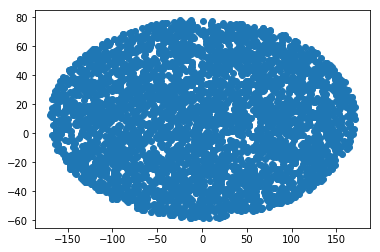

805


In [2]:
plt.scatter(xL,yL)
plt.show()
#print(len(counties),len(cities))
cities = list(set(cities))
print(len(cities))

In [3]:
settings = {"units": "metric", "appid": api_key}
weather_data = []
data = []
full_data = []
for city in cities:
    try:
        weather_data = [owm.get_current(city, **settings)]
        summary = ['main.temp','main.humidity','wind.speed','clouds.all','sys.country','name','coord.lat','coord.lon']
        data = [response(*summary) for response in weather_data]
        full_data.append(data)
    except:
        #print('"%s" city is not found'%(city))
        cities.remove(city)
print(len(cities))
print(cities)

717
['brae', 'tokmak', 'kokstad', 'oussouye', 'mogadishu', 'trairi', 'gabu', 'exaplatanos', 'synya', 'jaciara', 'dutse', 'almenara', 'tasiilaq', 'aksarka', 'kochi', 'abalak', 'navodari', 'bredasdorp', 'ribeira do pombal', 'damietta', 'luau', 'dmitriyevka', 'verkhnyaya toyma', 'arona', 'anloga', 'krasnyy yar', 'bindura', 'dori', 'nouadhibou', 'victoria', 'awbari', 'humberto de campos', 'atar', 'umm kaddadah', 'pelym', 'kyabe', 'pombia', 'magaria', 'mahebourg', 'concepcion', 'nkhata bay', 'manjeshwar', 'lambarene', 'goba', 'votkinsk', 'ballina', 'saint-francois', 'correntina', 'port-gentil', 'lagoa', 'nara', 'abu ghosh', 'kolvereid', 'bonito', 'yomou', 'tukums', 'rumphi', 'chapayeve', 'goderich', 'eydhafushi', 'torbeyevo', 'qaqortoq', 'nybro', 'mehamn', 'necochea', 'krasnoarmeyskoye', 'fort-shevchenko', 'passo fundo', 'harper', 'menongue', 'nalut', 'opuwo', 'paso de los toros', 'svetlyy yar', 'nizwa', 'walvis bay', 'suez', 'inta', 'sumbe', 'cap malheureux', 'dossor', 'abu samrah', 'tanou

In [4]:
weather_df = pd.DataFrame(full_data)
weather_df = weather_df[0].apply(pd.Series)
weather_df.columns = ['Temperature (F)', 'Humidity (%)','Wind Speed (mph)','Cloudiness (%)','Country','City Name','Lat','Lon']

weather_df.to_csv("weather_for_random_city.csv", index=False, header=True)
weather_df.head()

,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%),Country,City Name,Lat,Lon
0,10.00,71,10.80,75,GB,Brae,60.40,-1.35
1,33.93,19,3.46,0,UA,Tokmak,47.26,35.70
2,20.93,29,3.11,0,ZA,Kokstad,-30.55,29.42
3,29.53,74,3.10,40,SN,Oussouye,12.49,-16.54
4,29.00,79,7.70,20,SO,Mogadishu,2.04,45.34


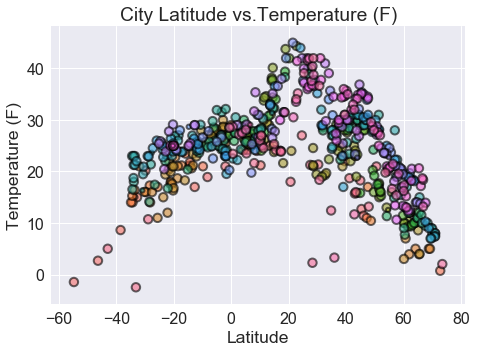

In [5]:
#Temperature (F) vs. Latitude
sns.set_context("notebook", font_scale=1.6)
sns.set_style("darkgrid")  #ticks
sns.lmplot('Lat', # Horizontal axis
           'Temperature (F)', # Vertical axis
           data=weather_df, # Data source
           fit_reg=False,legend=False, # Don't fix a regression line
           hue='Lon',aspect=1.4,scatter_kws={"s" :weather_df['Humidity (%)'],'alpha':0.6,'edgecolors':"black",'linewidth':2}) # Set color # S marker size
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs.Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

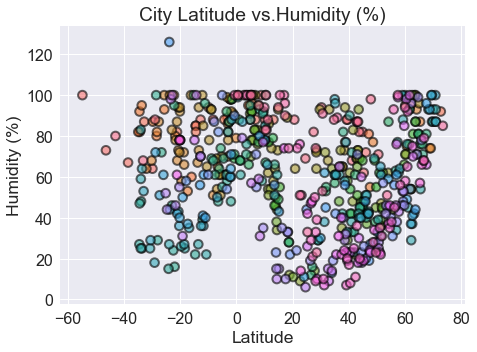

In [6]:
#Humidity (%) vs. Latitude
sns.set_context("notebook", font_scale=1.6)
sns.set_style("darkgrid")  #ticks
sns.lmplot('Lat', # Horizontal axis
           'Humidity (%)', # Vertical axis
           data=weather_df, # Data source
           fit_reg=False,legend=False, # Don't fix a regression line
           hue='Lon',aspect=1.4,scatter_kws={"s" :weather_df['Cloudiness (%)'],'alpha':0.6,'edgecolors':"black",'linewidth':2}) # Set color # S marker size
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs.Humidity (%)")
plt.savefig("Humidity (%).png")
plt.show()


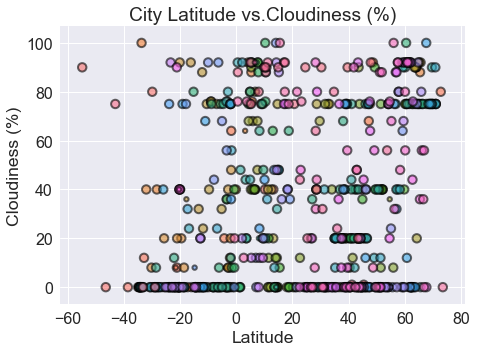

In [7]:
#Cloudiness (%) vs. Latitude
sns.set_context("notebook", font_scale=1.6)
sns.set_style("darkgrid")  #ticks
sns.lmplot('Lat', # Horizontal axis
           'Cloudiness (%)', # Vertical axis
           data=weather_df, # Data source
           fit_reg=False,legend=False, # Don't fix a regression line
           hue='Lon',aspect=1.4,scatter_kws={"s" :weather_df['Humidity (%)'],'alpha':0.6,'edgecolors':"black",'linewidth':2}) # Set color # S marker size
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs.Cloudiness (%)")
plt.savefig("Cloudiness.png")
plt.show()


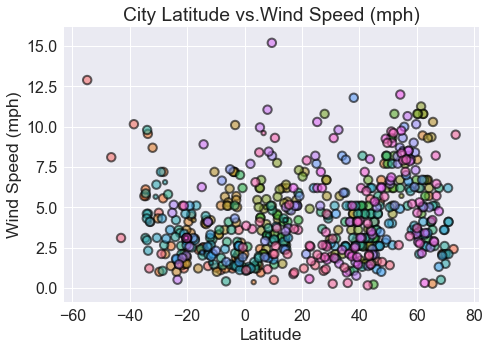

In [8]:
#Wind Speed (mph) vs. Latitude
#Cloudiness (%) vs. Latitude
sns.set_context("notebook", font_scale=1.6)
sns.set_style("darkgrid")  #ticks
sns.lmplot('Lat', # Horizontal axis
           'Wind Speed (mph)', # Vertical axis
           data=weather_df, # Data source
           fit_reg=False,legend=False, # Don't fix a regression line
           hue='Lon',aspect=1.4,scatter_kws={"s" :weather_df['Humidity (%)'],'alpha':0.6,'edgecolors':"black",'linewidth':2}) # Set color # S marker size
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs.Wind Speed (mph)")
plt.savefig("Wind_speed.png")
plt.show()